## Sentiment analysis on Amazon cell phone reviews 

***The aim of the above-mentioned project is to perform sentiment analysis on the customer reviews based off the cell phones that are bought by the customers on Amazon i.e. determine cell phone review sentiment (is the customer angry or happy with phone)***

***Here, we will use the star rating and the customer's review to primarily classify the customer's sentiment towards the phone bought***

## Context

 The project is aimed towards performing sentiment analysis using Amazon customer reviews on cell phones. The dataset focuses on both unlocked and locked carriers, and scoped on ten brands: ASUS, Apple, Google, HUAWEI, Motorola, Nokia, OnePlus, Samsung, Sony, and Xiaomi.

Content
Published here are two files, items.csv and reviews.csv with a date prefixed which indicates when the data is retrieved.

items.csv contains retrieved (read: scraped) items from Amazon.com search results using generated URL and specific query string to search only specific brands and has minimal 1 star review.

reviews.csv contains reviews for previously retrieved items at items.csv but not with columns from items.csv.

The dataset can be found on [kaggle](https://www.kaggle.com/grikomsn/amazon-cell-phones-reviews)

## Tasks

- Data Exploration

- Data preprocessing

- Implementation and Evaluation of Models (Naive Bayes, SVM, Logistic Regression)

## Data Exploration

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#ignore harmless warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#items dataframe contains the phone brand reviewed by user but doesnot contain the review
#'asin' column is specific for a particular phone 

items = pd.read_csv('20190928-items.csv').set_index('asin')

In [3]:
items.shape

(792, 8)

In [4]:
items.head()

,brand,title,url,image,rating,reviewUrl,totalReviews,prices
asin,,,,,,,,
B0000SX2UC,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,NaN
B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,2.9,https://www.amazon.com/product-reviews/B0009N5L7K,7,$49.95
B000SKTZ0S,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,https://www.amazon.com/MOTOROLA-C168i-CINGULAR...,https://m.media-amazon.com/images/I/71b+q3ydkI...,2.6,https://www.amazon.com/product-reviews/B000SKTZ0S,22,NaN
B00198M12M,Nokia,Nokia 6500 Slide Black/silver Unlocked Cell Phone,https://www.amazon.com/Nokia-6500-Slide-silver...,https://m.media-amazon.com/images/I/41ss4HpLkL...,2.4,https://www.amazon.com/product-reviews/B00198M12M,5,NaN
B001AO4OUC,Motorola,Motorola i335 Cell Phone Boost Mobile,https://www.amazon.com/Motorola-i335-Phone-Boo...,https://m.media-amazon.com/images/I/710UO8gdT+...,3.3,https://www.amazon.com/product-reviews/B001AO4OUC,21,NaN


In [5]:
#the unique rating for each phone brand in 'items dataframe'

items.rating.unique()

array([3. , 2.9, 2.6, 2.4, 3.3, 3.2, 2. , 2.7, 3.5, 2.8, 3.4, 3.1, 4. ,
       2.5, 3.6, 1. , 3.7, 3.8, 3.9, 4.1, 2.3, 4.2, 4.6, 4.5, 5. , 2.2,
       4.4, 2.1, 4.3, 4.7, 1.8, 4.8])

In [6]:
items.rating.value_counts()

4.0    62
3.8    59
3.9    58
3.6    56
3.5    54
3.7    51
3.4    46
4.2    42
3.2    40
3.0    38
4.1    32
3.3    31
3.1    26
5.0    25
2.9    24
4.3    21
4.4    21
4.5    17
2.8    15
1.0    12
2.0    12
4.6    11
2.6    10
2.7     7
2.4     5
2.5     5
4.7     3
2.3     3
2.1     2
4.8     2
2.2     1
1.8     1
Name: rating, dtype: int64

In [7]:
#lets change the rating name to average rating of review for each review

items['average_rating'] = items.rating
items = items.drop('rating', axis = 1)


In [8]:
items.head(2)

,brand,title,url,image,reviewUrl,totalReviews,prices,average_rating
asin,,,,,,,,
B0000SX2UC,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,https://www.amazon.com/product-reviews/B0000SX2UC,14,NaN,3.0
B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,https://www.amazon.com/product-reviews/B0009N5L7K,7,$49.95,2.9


In [9]:
#rev contains the reviews  by customers tht bought phone on amazon

rev = pd.read_csv('20190928-reviews.csv')

In [10]:
rev.shape

(82815, 8)

In [11]:
rev.head(10)

,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0
5,B0000SX2UC,J. White,4,"September 25, 2005",False,Worked great for me,"Hello, I have this phone and used it until I d...",NaN
6,B0000SX2UC,the cell phone store owner,5,"April 16, 2004",False,Wanna cool Nokia? You have it here!,Cool. Cheap. Color: 3 words that describe the ...,2.0
7,B0000SX2UC,Matt,4,"April 3, 2004",False,Problem with 3588i universal headset,"The 3599i is overall a nice phone, except that...",2.0
8,B0000SX2UC,Charles Cook,5,"November 24, 2003",False,cool phone!!!!!!!!,"I've never owned a Nokia phone before, so this...",7.0
9,B0000SX2UC,Amazon Customer,3,"February 2, 2004",False,Pissed off-a little bit,ok well im in school and i need the text messa...,3.0


In [12]:
#let change the title column_name to title_review and the body column_name to body_review in our rev dataframe

rev['title_review'] = rev['title']
rev['body_review'] = rev['body']

In [13]:
rev.head()

,asin,name,rating,date,verified,title,body,helpfulVotes,title_review,body_review
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0,Love This Phone,"This is a great, reliable phone. I also purcha..."
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0,"Love the Phone, BUT...!","I love the phone and all, because I really did..."
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...


In [14]:
#lets drop the title and body column
rev = rev.drop(['title', 'body'], axis = 1)

In [15]:
#lets merge the two dataframe based on the common column that both dataframe have which is 'asin'

review = pd.merge(items, rev, on='asin')

In [16]:
review.head()

,asin,brand,title,url,image,reviewUrl,totalReviews,prices,average_rating,name,rating,date,verified,helpfulVotes,title_review,body_review
0,B0000SX2UC,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,https://www.amazon.com/product-reviews/B0000SX2UC,14,NaN,3.0,Janet,3,"October 11, 2005",False,1.0,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...
1,B0000SX2UC,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,https://www.amazon.com/product-reviews/B0000SX2UC,14,NaN,3.0,Luke Wyatt,1,"January 7, 2004",False,17.0,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...
2,B0000SX2UC,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,https://www.amazon.com/product-reviews/B0000SX2UC,14,NaN,3.0,Brooke,5,"December 30, 2003",False,5.0,Love This Phone,"This is a great, reliable phone. I also purcha..."
3,B0000SX2UC,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,https://www.amazon.com/product-reviews/B0000SX2UC,14,NaN,3.0,amy m. teague,3,"March 18, 2004",False,1.0,"Love the Phone, BUT...!","I love the phone and all, because I really did..."
4,B0000SX2UC,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,https://www.amazon.com/product-reviews/B0000SX2UC,14,NaN,3.0,tristazbimmer,4,"August 28, 2005",False,1.0,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...


In [17]:
#lets drop some columns that we are not going to analysze/use

review = review.drop(['url', 'image'], axis = 1)

In [18]:
#lets check for missing values

review.isnull().sum()

asin                  0
brand                 0
title                 0
reviewUrl             0
totalReviews          0
prices            23670
average_rating        0
name                  5
rating                0
date                  0
verified              0
helpfulVotes      49681
title_review         10
body_review          20
dtype: int64

In [19]:
#lets check the brands that were been reviewed by the customers

review.brand.unique()

array(['Nokia', 'Motorola', 'Sony', 'Samsung', 'HUAWEI', 'Apple',
       'OnePlus', 'Google', 'ASUS', 'Xiaomi'], dtype=object)

In [20]:
#set d ratings values to integer

review['rating'] = review.rating.astype(int)

In [21]:
#lets crosscheck the average rating of a phone brand by the customers for each of the phone brands

review.groupby('brand').rating.mean()

brand
ASUS        3.712302
Apple       3.641032
Google      3.636634
HUAWEI      4.312646
Motorola    3.774259
Nokia       3.594792
OnePlus     3.889876
Samsung     3.747612
Sony        3.716312
Xiaomi      4.350746
Name: rating, dtype: float64

From the result above, we could see that the average rating of the reviews was between 3.5 to 4.3, which indicates that most customers were satisfied with the phone bought on Amazon. 

Text(0, 0.5, 'Count')

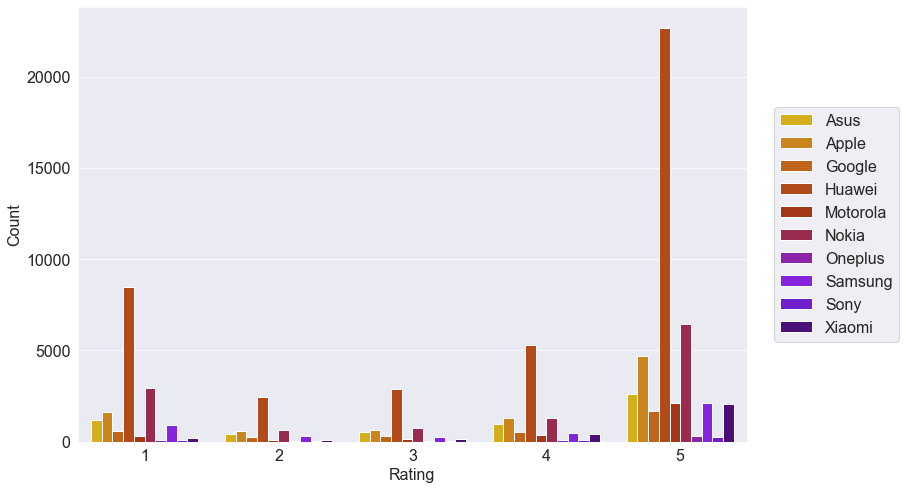

In [22]:
#let visualize the rating distribution among different brands

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}

plt.rc('font', **font)

plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
plt.legend(bbox_to_anchor=(1, 1), loc=2, labels = review.brand)


labels = ['Asus', 'Apple', 'Google', 'Huawei', 'Motorola', 'Nokia', 'Oneplus', 'Samsung', 'Sony', 'Xiaomi']
ax = sns.countplot(x = 'rating', hue = 'brand', data = review, palette= 'gnuplot_r')
ax.legend(labels, bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)

ax.set_xlabel("Rating")
ax.set_ylabel("Count")

From the above plot, we observe that **Huawei** has the ***best ratings and also the worst ratings among the brands.***

In [23]:
#since the average rating from the previous item df is not in correlation with the one just calculated, we would drop it
review = review.drop('average_rating', axis = 1)

## Feature Engineering

Feature engineering is the process of creating new features that don't exist in the data for purpose of achieving the aim of your project.

In [24]:
#notice that rating 3 is mixture of positive and negative comments as a result we are going to exclude it.

review[review.rating == 3].sample(5)

,asin,brand,title,reviewUrl,totalReviews,prices,name,rating,date,verified,helpfulVotes,title_review,body_review
52729,B0731XJ4FB,Samsung,Samsung Galaxy S7 Edge 32GB G935T for T-Mobile...,https://www.amazon.com/product-reviews/B0731XJ4FB,109,$188.95,Roberto A. Diaz,3,"January 2, 2018",True,2.0,Beware,Great phone but missing two things: a working ...
5299,B00D99ZBR6,Samsung,Samsung Galaxy Prevail II (Boost Mobile) (Disc...,https://www.amazon.com/product-reviews/B00D99ZBR6,311,$99.00,Kristen Abel,3,"January 1, 2015",True,NaN,Older and Roughed Up,Older than I expected with a few dings.
28953,B01COSAKMI,HUAWEI,Huawei Mate 8 NXT-L09 32GB 6-Inch 4G LTE Facto...,https://www.amazon.com/product-reviews/B01COSAKMI,19,$138.00,Max,3,"January 16, 2017",True,2.0,No home button! Give me home button back! The ...,"The hardware is great, But the software is mes..."
76327,B07N91S9MW,Motorola,Moto G7 – Unlocked – 64 GB – Ceramic Black (US...,https://www.amazon.com/product-reviews/B07N91S9MW,178,"$249.99,$299.99",Nicholas Hilden,3,"July 28, 2019",True,1.0,Good phone with connectivity issues,Overall the phone is very nice and high qualit...
33317,B01FJT7E3M,Sony,"Sony Xperia XA Ultra unlocked smartphone,16GB ...",https://www.amazon.com/product-reviews/B01FJT7E3M,433,NaN,Leo M,3,"October 31, 2016",True,2.0,Awesome phone Slight damage,"The phone came in quick,the only problem I rea..."


In [25]:
#lets create a new df without rating 3

review = review[review.rating != 3]

In [26]:
#lets cross-check the new review dataframe

review.rating.value_counts()

5    45012
1    16429
4    10710
2     4907
Name: rating, dtype: int64

In [27]:
#lets define a new column called "Sentiment", where ratings less than and equal to 2 are negative sentiments; 
#while ratings 4 & 5 are said to be towards positive sentiments
#Note that rating 3 is excluded to avoid misappropriate sentiment analysis

review['sentiment'] = (review.rating >= 4).astype(int)

In [28]:
#lets take a quick look at our df
review.sample(5)

,asin,brand,title,reviewUrl,totalReviews,prices,name,rating,date,verified,helpfulVotes,title_review,body_review,sentiment
3355,B009ZC91AY,Nokia,Nokia Lumia 920 32GB Unlocked 4G LTE Windows S...,https://www.amazon.com/product-reviews/B009ZC91AY,147,$89.00,Vikram Balakrishnan,5,"November 20, 2012",False,7.0,"A Step in the right Direction for Nokia, and a...","What Can I say, I am fairly impressed with the...",1
4059,B00B2BYU1Q,Nokia,Nokia Lumia 920 32GB Unlocked GSM 4G LTE Windo...,https://www.amazon.com/product-reviews/B00B2BYU1Q,575,NaN,Dean C.,4,"December 14, 2014",True,NaN,I think the Lumia is a great phone and this on...,I think the Lumia is a great phone and this on...,1
81515,B07QZSD327,Samsung,"Samsung Galaxy A30 (64GB, 4GB RAM) 6.4"" FHD+ I...",https://www.amazon.com/product-reviews/B07QZSD327,172,$203.07,Ron,5,"June 25, 2019",True,NaN,excellent!,Great phone for value.,1
38386,B01M01YX15,Google,Google Pixel Phone - 5 inch display (Factory U...,https://www.amazon.com/product-reviews/B01M01YX15,284,$217.99,TRB,5,"January 4, 2018",True,14.0,Great phone. I consider this to be an upgrade ...,Great phone. I consider this to be an upgrade ...,1
5373,B00DUJ6TYY,Samsung,"Samsung Galaxy Mega I9152 5.8"" Android Smart P...",https://www.amazon.com/product-reviews/B00DUJ6TYY,198,NaN,Pat Carroll,4,"March 18, 2015",True,2.0,Very nice phone for the money,Very nice phone but I've had a hard time getti...,1


In [29]:
#lets see how many reviews each brand has

review.groupby('brand').totalReviews.count()

brand
ASUS          467
Apple       11289
Google       3752
HUAWEI       2855
Motorola     8200
Nokia        5232
OnePlus       528
Samsung     38877
Sony         3076
Xiaomi       2782
Name: totalReviews, dtype: int64

This shows that Samsung and Apple has the highest numbers of reviews, this is directly related to the amount of people that bought these phones on amazon, this may further influence our sentiment analysis

In [30]:
#lets drop the missing values in title and body reviews column

review = review[review.title_review.notnull()]
review = review[review.body_review.notnull()]

In [31]:
review.isnull().sum()

asin                0
brand               0
title               0
reviewUrl           0
totalReviews        0
prices          21974
name                3
rating              0
date                0
verified            0
helpfulVotes    46248
title_review        0
body_review         0
sentiment           0
dtype: int64

In [32]:
#lets reformat our date column to a pandas datetime format

review['date'] = pd.to_datetime(review.date)

In [33]:
#lets check the last day the review was acquired
#the last date was on September 27, 2019

review.sort_values('date', ascending = False).head(1)

,asin,brand,title,reviewUrl,totalReviews,prices,name,rating,date,verified,helpfulVotes,title_review,body_review,sentiment
58553,B0775FLHPN,Apple,"Apple iPhone 8 Plus, GSM Unlocked, 64GB - Spac...",https://www.amazon.com/product-reviews/B0775FLHPN,444,$465.00,Agustina Arias,1,2019-09-27,True,NaN,Está bloqueado,"No funciona, está bloqueado",0


In [34]:
#lets extract the year from our date column

review['year'] = review.date.dt.year

In [35]:
#lets take a look at the amount of review per year

review.groupby('year').totalReviews.count()

year
2003        2
2004        7
2005        3
2006        2
2007        4
2008        6
2009       21
2010       48
2011      143
2012      549
2013     1554
2014     3633
2015     5339
2016     6949
2017    11052
2018    18315
2019    29402
Name: totalReviews, dtype: int64

Text(0, 0.5, 'Count')

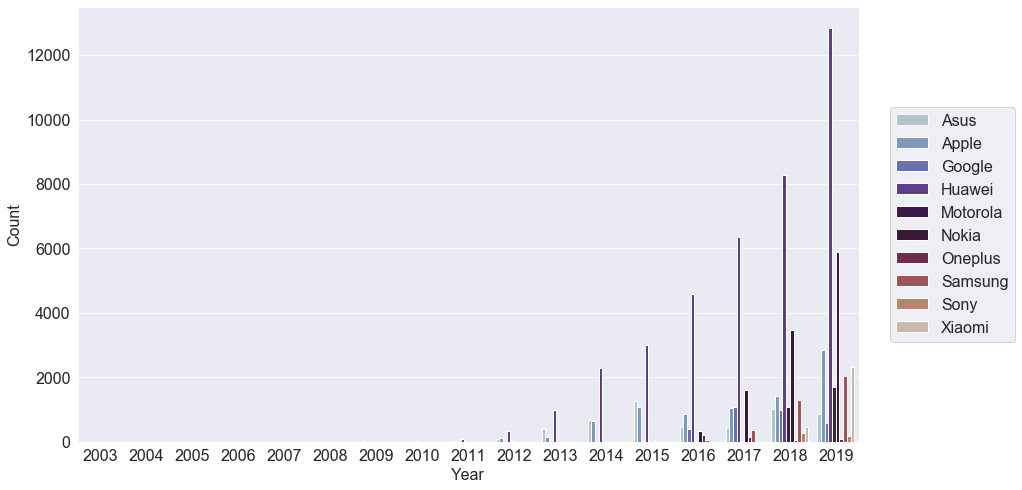

In [36]:
#let visualize the review counts over the years among different brands

plt.figure(figsize = (14,8))
plt.legend(bbox_to_anchor=(1, 1), loc=2, labels = review.brand)


labels = ['Asus', 'Apple', 'Google', 'Huawei', 'Motorola', 'Nokia', 'Oneplus', 'Samsung', 'Sony', 'Xiaomi']
ax = sns.countplot(x = 'year', hue = 'brand', data = review, palette= 'twilight')
ax.legend(labels, bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)

ax.set_xlabel("Year")
ax.set_ylabel("Count")

The reviews are mostly recent for most of the brands as seen in the above plots.

In [37]:
review.sentiment.value_counts()

1    55701
0    21328
Name: sentiment, dtype: int64

***Notice that the sentiment values are imbalanced, we will come back to solve this riddle during the evaluation of the model performance***

Text(0, 0.5, 'Count')

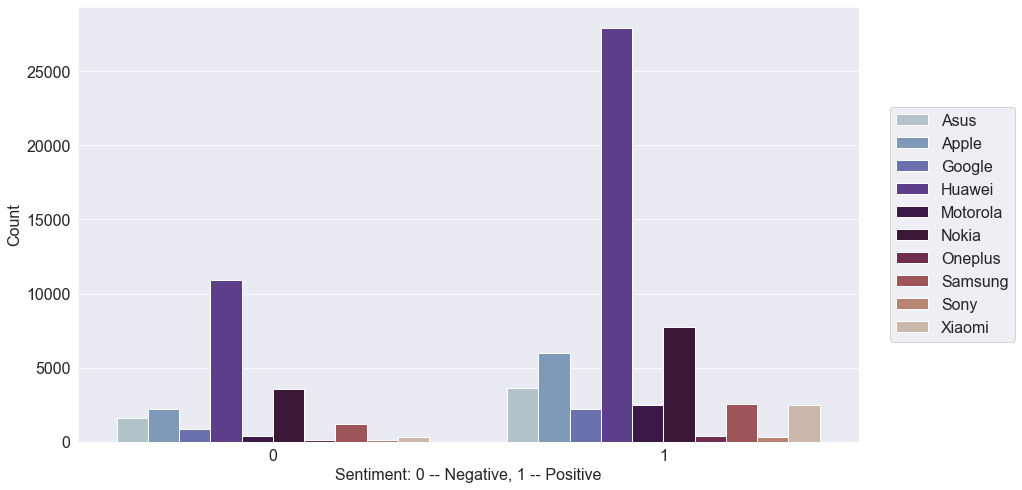

In [38]:
#let visualize the sentiments among the brands

plt.figure(figsize = (14,8))
plt.legend(bbox_to_anchor=(1, 1), loc=2, labels = review.brand)


labels = ['Asus', 'Apple', 'Google', 'Huawei', 'Motorola', 'Nokia', 'Oneplus', 'Samsung', 'Sony', 'Xiaomi']
ax = sns.countplot(x = 'sentiment', hue = 'brand', data = review, palette= 'twilight')
ax.legend(labels, bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)

ax.set_xlabel("Sentiment: 0 -- Negative, 1 -- Positive")
ax.set_ylabel("Count")

In [39]:
len(review[review.date >= '2019-07-01'])

13053

In [40]:
#lets concatenate the title and body review to form one full review

review['full_review'] = review.title_review.str.cat(review.body_review, sep = ': ', na_rep = 'na')

In [41]:
#lets split the dataset into train and test data
#reviews that comes after '2019-July-01' are the test data while those that comes before the date are test data

train = review[review.date < '2019-07-01'].copy()
test = review[review.date >= '2019-07-01'].copy()

In [42]:
train.sentiment.value_counts()

1    45846
0    18130
Name: sentiment, dtype: int64

In [43]:
train.columns

Index(['asin', 'brand', 'title', 'reviewUrl', 'totalReviews', 'prices', 'name',
       'rating', 'date', 'verified', 'helpfulVotes', 'title_review',
       'body_review', 'sentiment', 'year', 'full_review'],
      dtype='object')

In [44]:
#test data indicates the out of sample (i.e real world) data that we would like to test our data on.

test.shape

(13053, 16)

In [45]:
test.sentiment.value_counts()

1    9855
0    3198
Name: sentiment, dtype: int64

## Data preprocessing

The preprocessing techniques includes Lowercasing, Stemming, Stopwords and Noise Removal on the data set provided. Each of this techniques helps significantly in the consistency of having expected output (i.e. lowercasing), useful for dealing with sparsity issues as well as standardizing vocabulary (i.e. Stemming), removal of a set of commonly used words in english in order to focus on the important words instead (i.e. Stopwords removal) and further removing characters digits and pieces of text that can interfere with our text analysis (i.e. Noise Removal).

***The preprocessing will be done using review_to_word function and CountVectorizer***


In [46]:
#example of how preprocessing works

train.loc[5, 'full_review']

'Worked great for me: Hello, I have this phone and used it until I decided to buy a flip phone. I have had NO problems with the battery or new cases--it has a new fish case on it now and it stays as well as the original one. I have added ring tones, and music so it was all good for me--as a matter of fact I am willing to sell this phone, the home charger and the car charger for a great deal--email me--(...)'

In [47]:
train['full_review'] = train.full_review.astype(str)

In [48]:
#lets use regular expression to remove some alpha-numeric characters that are persistent
#use nltk to transform the words to their root forms

import re
import nltk
from nltk.stem.porter import *

Replace_with_space = re.compile('(\===>|\.|:|\?|\!|\(|\)|\#|\&|\--)')

def review_to_words(df):
    df['full_review'] = df.full_review.apply(lambda x : Replace_with_space.sub("", x.lower()))
    df['full_review'] = df.full_review.apply(lambda x : PorterStemmer().stem(x))
    return df

In [49]:
review_to_words(train)
train.loc[5, 'full_review']

'worked great for me hello, i have this phone and used it until i decided to buy a flip phone i have had no problems with the battery or new casesit has a new fish case on it now and it stays as well as the original one i have added ring tones, and music so it was all good for meas a matter of fact i am willing to sell this phone, the home charger and the car charger for a great dealemail m'

In [50]:
X_train = train.full_review
y_train = train.sentiment

In [51]:
y_train.value_counts()

1    45846
0    18130
Name: sentiment, dtype: int64

As you can observe, the sentiments are highly biased i.e. the data is im-balanced, because most of the sentiments are positive.

In [52]:
#import and instantiate countvectorizer
#Note Count vectorizer will further perform other preprocessing steps
#you can read the sklearn docs on countvectorizer to understand the arguments passed in CountVectorizer()

from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(stop_words = 'english', ngram_range = (1,2), min_df = 1, max_df = 0.7)

In [53]:
#Note that the vectorizer further exclude punctuations and stop_words from the input text

vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=0.7, max_features=None, min_df=1,
                ngram_range=(1, 2), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

## Models to be utilized for this analysis are all linear classifiers and are as follows:

- **Naive Bayes**
- **Support Vector Machines**
- **Logistic Regression**

***Grid search will be done for each of the model for the purpose of choosing the best parameters from each of them, note that cross validation is done during gridsearch to further evaluate the model's performance on chosen parameters***

- **Naive Bayes:**  Naive Bayes classifiers, a family of classifiers that are based on the popular Bayes’ probability theorem, are known for creating simple yet well performing models, especially in the fields of document classification. Naive Bayes classifiers are **linear classifiers that are known for being simple yet very efficient.**

- Naive Bayes classifiers is based on the concept of Bayes’ rule. Bayes’ theorem forms the core of the whole concept of naive Bayes classification; it can be written down in simple words as follows:

    Posterior Probability = Conditional Probability . Prior Probability / evidence
    
    
- Assuming, we want to classify x (e.g. our review) to class i (i.e. either positive (1) or negative class (0)), the posterior probability of x in classification context is: ***What is the probability that a particular object x belongs to class i given its observed feature values?”***


- And this can be define as: P(ωj∣xi)= P(xi∣ωj) ⋅ P(ωj) / P(xi), where i represent each sample of x, and wj represent the notation of class j.


- the Conditional probablilty considers each sample of x independent and identically distributed, and is define by ***How likely is it to observe particular pattern x given that it belongs to class wj?*** This means what is the maximum likelihood of observing feature x in class wj. 


- This can be estimated by calculating the “individual” likelihoods of observing every feature in the feature vector **x** in class wj. this is said to be estimated via the maximum-likelihood estimate: 


- which is define as  P(xi∣ωj)= Nxi,ωj / Nωj       (i=(1,...,d))

    Nxi,ωj denotes Number of times feature xi appears in samples from class ωj
    
    Nωj denotes Total count of all features in class ωj.
    
    
- Prior Probability are also called class priors, which describe ***“the general probability of encountering a particular class.”***

- a priori knowledge can be obtained, e.g., by consulting a domain expert or by estimation from the training data assuming that the training data is i.i.d.(independent and identically distributed) and a representative sample of the entire population. 


- If estimated from the training data, the maximum-likelihood estimate approach can be formulated as:  P(ωj)=Nωj / Nc

    Nωj denotes Count of samples from class ωj
    
    Nc denotes Count of all samples
    
- The evidence P(x) can be understood as ***the probability of encountering a particular pattern x independent from the class label.*** this is usually a constant value.


**you can read more on naive bayes by downloading this [paper](https://arxiv.org/pdf/1410.5329.pdf)**

In [54]:
#import and instantiate nultinomialnaive bayes

from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [55]:
#import and instantiate pipeline (to make sequential steps), gridsearch and cross-validation

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [56]:
#parameters we want to optimize for baive bayes in order to get the optimal results
#for naive bayes we only tune the alpha parameters
#other parameters i.e. class/fit_prior is left to the discretion of the model coz this require domain experience

param_grid = {}
param_grid['multinomialnb__alpha'] = [0.2, 0.4, 0.6, 1.0]
param_grid

{'multinomialnb__alpha': [0.2, 0.4, 0.6, 1.0]}

In [57]:
#instantiate pipeline for naive bayes incorporating Countvectorizer

pipe_nb = make_pipeline(vect, nb)

In [58]:
#examine the pipeline steps
pipe_nb.steps

[('countvectorizer',
  CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                  dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                  lowercase=True, max_df=0.7, max_features=None, min_df=1,
                  ngram_range=(1, 2), preprocessor=None, stop_words='english',
                  strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                  tokenizer=None, vocabulary=None)),
 ('multinomialnb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))]

Note: Because our target feature is **imbalanced** i.e. the proportion of 1 -- positive is far more greater than 0 -- negative sentiment, we will be using ***ROC_AUC_SCORE*** as our evaluation metric.


- Also, we will using the ***CONFUSION MATRIX*** to visualize the proportion of misclassified and classified reviews later in this section.



- Just to summarize, Area Under ROC Curve (AUROC) is recommended because it represent represents the likelihood of your model distinguishing observations from two classes. In other words, if you randomly select one observation from each class, what's the probability that your model will be able to "rank" them correctly? you can read more on this [here](https://stats.stackexchange.com/questions/132777/what-does-auc-stand-for-and-what-is-it).



- Also, When we make a binary prediction, Confusion matrix outputs 4 types of outcomes:

- We predict 0 while the true class is actually 0: this is called a **True Negative,** i.e. we correctly predict that the class is negative (0). For example, the actual negative sentiment is predicted to negative.

- We predict 0 while the true class is actually 1: this is called a **False Negative,** i.e. we incorrectly predict that the class is negative (0). For example, an actual positive sentiment is predicted to be negative.

- We predict 1 while the true class is actually 0: this is called a **False Positive,** i.e. we incorrectly predict that the class is positive (1). For example, an actual negative sentiment is predicted to be positive.

- We predict 1 while the true class is actually 1: this is called a **True Positive,** i.e. we correctly predict that the class is positive (1). For example, an actual positive sentiment is predicted to be positive.

In [59]:
#instantiate gridsearch, pass the pipe into the gridsearch

grid_nb = GridSearchCV(pipe_nb, param_grid, cv = 10, scoring = 'roc_auc' )

In [60]:
%time grid_nb.fit(X_train, y_train)

Wall time: 6min 28s


GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('countvectorizer',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=0.7,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 2),
                                                

In [61]:
#print the best scores and parameters 

print(grid_nb.best_score_)
print(grid_nb.best_params_)

0.9586943386172484
{'multinomialnb__alpha': 0.2}


In [62]:
#lets evaluate naive bayes model on our test data
#first let pre-process the test data

test = review_to_words(test)

In [63]:
x_test = test.full_review
y_test = test.sentiment

In [64]:
# grid search automatically refit the best model with the entire data set and can be used for predictions

nb_pred = grid_nb.predict(x_test)
nb_pred

array([0, 0, 1, ..., 0, 1, 1])

In [65]:
from sklearn.metrics import confusion_matrix,roc_auc_score,classification_report,roc_curve

In [66]:
#lets calculate the roc_auc and confusion_matrix

print(roc_auc_score(y_test, nb_pred), '\n')

print(confusion_matrix(y_test, nb_pred), '\n')

print(classification_report(y_test, nb_pred))

0.9074968849442622 

[[2754  444]
 [ 455 9400]] 

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      3198
           1       0.95      0.95      0.95      9855

    accuracy                           0.93     13053
   macro avg       0.91      0.91      0.91     13053
weighted avg       0.93      0.93      0.93     13053



***As observed above, about ~ 450 reviews are misclassified (both false negatives and positives), even though the area under the ROC curve is ~ 0.9 which is very good for a classifier.***

***We will see the performance of the other models on the data in the next sections.***

In [67]:
#lets define a function that takes in the model with the best parameters and plots out the ROC curve

def get_roc_curve(model, X, y):
    
    pred_proba = model.predict_proba(X)[:, 1]
    fpr, tpr, _ = roc_curve(y, pred_proba)
    
    plt.figure(figsize=(14,8))
    plt.plot(fpr, tpr, color="red")
    plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Roc curve')
    
    return plt.show()

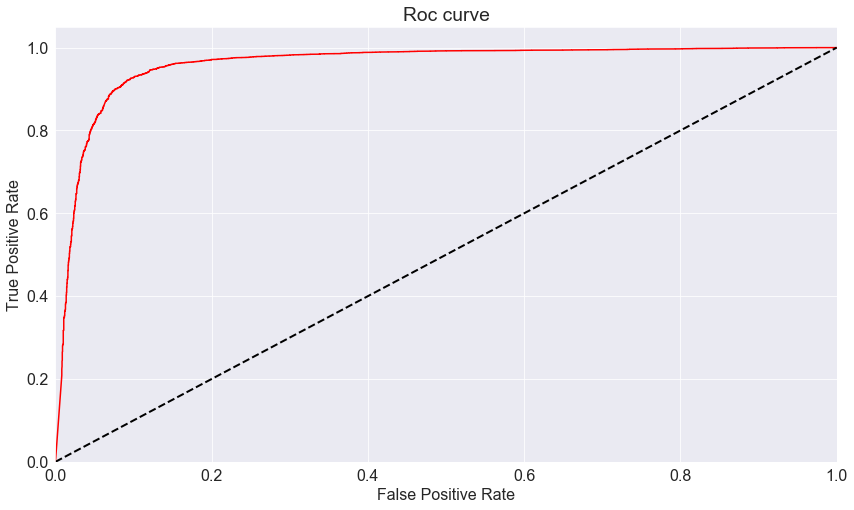

In [68]:
#lets visualize the roc_curve for the naive bayes

get_roc_curve(grid_nb.best_estimator_, x_test, y_test)

Note: **An AUC of 1.0 represents a perfect model, and an AUC of 0.5 represents random guessing. You can think of 0.5 as the AUC of the "null model".**

**ROC curve - plots the values of true positive rate (TPR) against the false positive rate (FPR). And when the TPR == ~1.0 and the FPR == ~ 0.0 (i.e. AUC == 1.0), it is said that your classifier/model actually performed extremely well in seperating your data set into 2 distinct classes irrespective of whether your dataset is imbalanced.**

## Lets try and find out the SVM performance on our data 

- **Support Vector Machines** is linear classification & regression classifier that seperates two distinct categories in an explicit way by transforming these observations into high dimensional space and find a relatively high dimensional support vector classifier which is known as a ***Hyperplane*** that can effectively categorize the observations into two categories.

- The ultimate aim of SVM is to transform data that are not linearly seperatable in 1-dimensional to higher dimensional space where they can be linearly seperatable, i.e. projecting data into higher dimension make them linearly seperatable.


- Before we discusss more on SVM let me state some underlying things here:

- Before SVM, we have a more primitive classifier called **Maximal Margin classifier** which classify the observations based on the largest distance btw the observations and a given threshold. ***this threshold is initially assigned to seperate 2 different observations, and the distance btw the threshold and the observations is called a Margin.*** So, Maximal Margin Classifier (MMC) gives the largest margin to make classification btw 2 observations given a threshold.


- One flaw of the MMC is that ***it does not allow misclassification, i.e. it is sensitive to outliers.***


- Choosing a threshold that allows misclassification is a typical example of bias/variance tradeoff. ***If we aallow misclassification, then we have high bias i.e. our classifier is not sensitive to the training data, but performs better on new data (i.e. we have low variance) BUT if we don't allow misclassification like the MMC, we have low bias i.e. our model is sensitive to the training data but perform poorly on the new data i.e. High variance.***


- When we allow misclassification, the distance btw the obbservations and the threshold is called **Soft margin.**


- cross validation can be used to determine how many misclassified observations to allow inside of the soft margin to get the **Best classification.**


- When we use soft margin to determine the location of threshold, we have a new classifier called **Soft/Support vector classifier (SVC),** the name SVC comes from the fact that the observations ***on the edge*** and within the ***soft margin*** are called ***SUPPORT VECTORS.***


- When the observations/data have more than 3 features i.e. greater than 3 dimensions, the SVC is a ***Hyperplane***


- When SVC cannot differentiate/categorize/classify observations due to large sum of overlapping within the observations, the observations/data are moved into higher dimensional space, and the classifiers that seperates data into 2 distinct groups in this high dimensional space are called **SUPPORT VECTOR MACHINES**

- Support vector machines use ***KERNEL FUNCTIONS*** to systematically finds SVCs in higher dimensions that can seperate the data.

- **Polynomial kernel function** has a parameter **d -- degree of polynomial,** that determines the dimension upon which the observations are classified. i.e. polynomial kernel computes the relationship between ***each pair of observations*** in n-dimensions (depends on the value of d) to find SVC.


- Note that, Kernel functions **DO NOT** actually traansform the observations into high dimensional space, ***they only calculate the relationships btw every pair of data points (observations) as if they are in higher dimensional space.***


- polynomial kernel == (a x b + r)^d; a & b are 2 different observations, r -- coefficient of the polynomial, d -- degree of the polynomial.

- We also have ***Radial Kernel function*** is used to find the SVC in infinite dimensions, the radial kernel behaves like a ***weighted nearest neighbor model*** i.e. the closest neighbors to the new observations have a stronger influence on the new observations than those afar off. 


- The amount of influence one observation has on the other is a function of the squared distance btw 2 observations (i.e. (a - b)^2): 
            == e^-g(a-b)^2
            where, g - gamma ---> scales the squared distance, thus scales the influence
            
- Note: ***When the observations are far from each other, we get a number close to zero but if otherwise we have a higher number (or stronger influence on the new observations)***

--- check this [youtubevideo for more intuitive explanation on SVM](https://www.youtube.com/watch?v=Qc5IyLW_hns)

In [69]:
#import and instantiate SVM

from sklearn.svm import LinearSVC
svc = LinearSVC(class_weight = 'balanced')

**C** - the parameter that helps you decide the how much you want to penalize misclassified points. It controls the trade off between smooth decision boundary and classifying training points correctly. A large value of c means you will get more training points correctly(penalize outliers) while a low value will be vice versa(accomodate outliers).

***since we are performing a binary classification with just an independent feature i.e. x_train.full_review, we will use kernel = linear***

***During training, we can use the argument class_weight='balanced'  to penalize mistakes on the minority class by an amount proportional to how under-represented it is.*** [read more here](https://elitedatascience.com/imbalanced-classes)

In [70]:
#we are only optimizing for the value of 'C' which is the penalizing for the amt of points we want to misclassified points or not!

param_gridsvc = {}
param_gridsvc['C'] = [0.02, 0.04, 0.06, 0.08, 0.1] #random float values 

param_gridsvc

{'C': [0.02, 0.04, 0.06, 0.08, 0.1]}

- Here, we are not going to **pipeline our vectorizer and model trainng steps**, because **'make_pipeline'** does not take **'C' parameter.**

In [71]:
#obtain vocabularies from the training data and vectorize your reviews

X_train_svc = vect.fit_transform(X_train)
X_testsvc = vect.transform(x_test) #we only vectorize the test data reviews

In [72]:
#instantiate gridsearch, pass the svc model into the gridsearch

grid_svc = GridSearchCV(svc, param_gridsvc, cv = 10, scoring = 'roc_auc')

In [73]:
%time grid_svc.fit(X_train_svc, y_train)

Wall time: 7min 44s


GridSearchCV(cv=10, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight='balanced', dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.02, 0.04, 0.06, 0.08, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [74]:
#print the best scores and parameters 

print(grid_svc.best_score_)
print(grid_svc.best_params_)

0.9724380457654558
{'C': 0.02}


In [75]:
# grid search automatically refit the best model with the entire data set and can be used for predictions

svc_pred = grid_svc.predict(X_testsvc)
svc_pred

array([0, 0, 1, ..., 0, 1, 1])

In [76]:
#lets calculate the roc_auc and confusion_matrix

print(roc_auc_score(y_test, svc_pred), '\n')

print(confusion_matrix(y_test, svc_pred), '\n')

print(classification_report(y_test, svc_pred))

0.9217741682158656 

[[2906  292]
 [ 642 9213]] 

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      3198
           1       0.97      0.93      0.95      9855

    accuracy                           0.93     13053
   macro avg       0.89      0.92      0.91     13053
weighted avg       0.93      0.93      0.93     13053



- Comments on the model performance on the test data:

***Here there is an improvement in the roc_auc score (~92%), but there is more false negatives (negatives i.e. 0 -- in our case) is more misclassified more than the positives -- 1.***


***As you can observed above, the precision for 1 (97%) is significantly higher than the one for 0(82%), this indicates less false positive (i.e. less misclassified 1s) and more false negatives(i.e.more misclassified 0s).***

### Here we didnt plot the ROC curve for SVM because, the Linearsvc classifier does not have ***predict_probability atrribute*** yet.

## Finally, lets see the model performance on logistic regression

- **Logistic Regression** is a linear classifier that is used to find the probability of an event occuring or not occuring / or been true or false. It is used mostly to predict a binary outcome given a set of independent variables. it predicts the probability of occurrence of an event by fitting data to a logit function / sigmoid function == 1 / 1 + e^-z; where z is the weighted input.


- In other words, Logistic regression fits an S-shaped function to the data points from 0 to 1 which predicts the probability that an event will occur or not.


- Logistic regression ability to provide probabilities and classify new samples using continous and discrete measurements makes it a useful classifier.


- **How does logistic regression calculate the best fit line for the data points/observations**


- This is done through the term called **Maximum (log) likelihood,** where the product of the individual likelihood (~ predicted probability) for each data points obtained from S-shaped curve is calculated and summed up together and the S-shaped line/curve with maximum likelihood (or highest, i.e. with sum of log likelihood of all the data points that this is most close to 0 (zero)) is said to be the Best fit line for the data points, **And this best fit line is used to determine the probability that a class or an event will occur based on the input data.**


- Now, **How do we determine or calculate for the Maximum Likelihood of the Logistic Regression:**


- First Step, Is to project the data points unto a graph (that will be used to determine the log(odds) of each data point), this data points will be pushed towards negative and poistive infinity on the graph (***because the data points either fall into a class (positive infinity) or not (negative infinity)***, then project the data onto an initial Co-ordinate line (usually, a random guess line /could be any line), then when you project the data points onto this line, you can obtain its log(odds) value for each data points, the log(odds) value is said to be on y-axis while the data points are on x-axis. 


- Note **The initial co-ordinate line that the data points are projected to** ***is just a RANDOM LINE / could be any line,*** BUT after the initial line the next line would be chosen to improve the maximum likelihood (i.e. reduce the error made by the intial one to get the data closest to their true probabilities when transformed to the S-shaped probability curve). ***This is usually done iteratively through gradient descent (basically get us to the minimum error as possible)***


- After getting the log(odds) value for each sample, we transform these values into probability which can be plotted as S-shaped curve on logistic regression graph based on sigmoid function. Note ***Sigmoid function is used to transform log(odds) values of each sample into a probability***.


- Sigmoid function == e^log(odds) / 1 + e^log(odds).


- After the transformation back to probability, we calculate the likelihood of each data points belonging to the class/event or not, and this is based on its position on the S-shaped curve. Note that the **likelihood of a data point belonging to an event or not is the same as its predicted probability.**



- Also, note that the likelihood of data points that belong to that particular class / event is given as their **predicted probaility i.e. their position on the y-axis on the S-shaped curve (usually their position is between 0 & 1)** while the likelihood of datapoints that do not belong to that particular class is given as **1 -(minus) their predicted probability (i.e. 1 -(minus) their position on the y-axis (usually their position will be btw 0 & 1).**


- Thereafter, the product of the likelihood of the individual data points is computed (or this can be done by adding up the log likelihood of each of the data points) and this value is kept in memory. 


- After calculating the maximum likelihood, **Transform the predicted probability of the individual data points back to their log(odds) form,** This is usually done using this formula: log(odd) == log(p / l - p); where p denotes the probability of class or event to be predicted.


- More explicitly, log(odds) == probability of an event or class occuring / probability of an event or class not occuring.


- This transformation is done for each data points or observations, where data points that are in that particular class are moved towards ***positive infinity*** and data points that are not of that class are moved towards ***negative infinity*** as discussed above.


- And ***another co-ordinate is chosen to correct for the mistakes of the initially chosen random co-ordinate line.*** 


- Thereafter, the data points are again projected unto this ***new & corrected co-ordinate line*** and the steps described above are done over and over again.


- After the steps highlighted above has been done for a number of times, The S-Shaped curve/line with the maximum likelihood i.e. ***loglikelihood whose sum (after adding up the likelihood of each data points) is closest to zero is considered the Best fit and the right model to be used for logistic regression.***


- Note: **The algorithm that finds the line with maximum likelihood is pretty smart, each time it rotates the co-ordinate line, it does so in a way to that increases the likelihood.**


- Note that ***The aim of the maximium likelihood based on the calculation of the predicted probability from the S-shaped curve, is to predict probabilities that are closest to the TRUE PROBABILITIES.***



- Note, for logistic regression ***least square error is not used, because the data points are pushed towards infinity***





- R^2 and p-value are used to evaluate the performance of the model.

       - R^2 = Loglikelihood(overall probability) * Loglikelihood(bestfitline) / Loglikelihood(overall probability)
       
- Note that Loglikelihood(overall probability) == count of datapoints that belongs to the class / total count of datapoints of the whole data
       
       
- R^2 can be used check if the features that act as predictors for the target variables are highly correlated to the target variables, if the R^2 is less than or == zero then they are not corelated, but if the R^2 is greater than 0 and ~ 1 then they are highly correlatable.


- p value is used to check if the R^2 values are statistically significant.

In [77]:
#import and instantiate logistic regression
#we have to specify the 'solver' attribute because is not set by default 
#and we specify the max_iter to accomodate the number of iterations needed for the 'lbfgs' convergence

from sklearn.linear_model import LogisticRegression
log = LogisticRegression(solver = 'lbfgs', max_iter = 6000)

In [78]:
#location of optimum tuning parameters by performing exhaustive grid search for countvectorizer and logistic regression
#you can add other parameters 

param_gridlog = {}
param_gridlog['logisticregression__penalty'] = ['l2']
param_gridlog['logisticregression__C'] = [0.01, 0.03, 0.1, 1.0]
param_gridlog

{'logisticregression__penalty': ['l2'],
 'logisticregression__C': [0.01, 0.03, 0.1, 1.0]}

In [79]:
pipe_log = make_pipeline(vect, log)

In [80]:
# pass the pipeline to GridSearchCV

grid_log = GridSearchCV(pipe_log, param_gridlog, cv=10, scoring='roc_auc')

In [81]:
# time for the grid search

%time grid_log.fit(X_train, y_train)

Wall time: 19min 13s


GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('countvectorizer',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=0.7,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 2),
                                                

In [82]:
#print the best scores and parameters 

print(grid_log.best_score_)
print(grid_log.best_params_)

0.9724855105230109
{'logisticregression__C': 1.0, 'logisticregression__penalty': 'l2'}


In [83]:
# grid search automatically refit the best model with the entire data set and can be used for predictions

log_pred = grid_log.predict(x_test)
log_pred

array([0, 0, 1, ..., 0, 1, 1])

In [84]:
#lets calculate the roc_auc and confusion_matrix for the test data

print(roc_auc_score(y_test, log_pred), '\n')

print(confusion_matrix(y_test, log_pred), '\n')

print(classification_report(y_test, log_pred))

0.9050346820644182 

[[2723  475]
 [ 408 9447]] 

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      3198
           1       0.95      0.96      0.96      9855

    accuracy                           0.93     13053
   macro avg       0.91      0.91      0.91     13053
weighted avg       0.93      0.93      0.93     13053



***This is similar to the predicted results from the naive bayes model, in which ~ 400 - 480 reviews are misclassified. Here there are slightly more false positives ~ 480 than the false negatives ~ 410.***

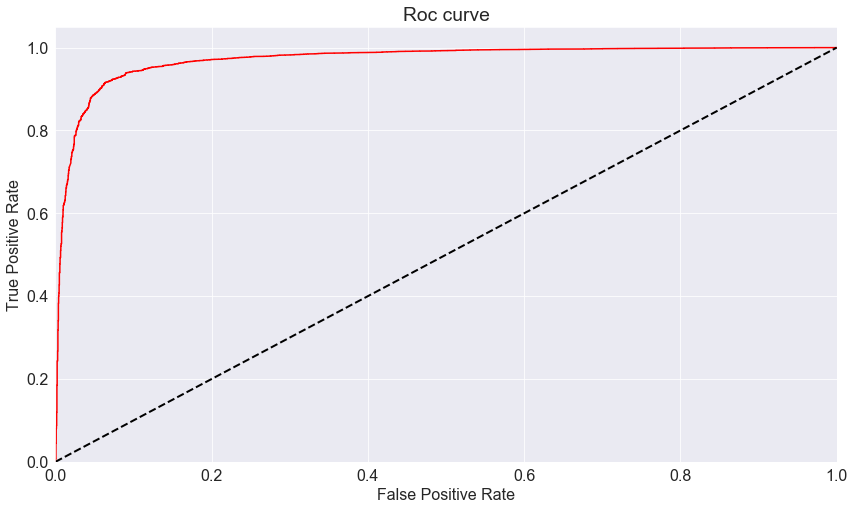

In [87]:
#lets visualize the roc_curve for the naive bayes

get_roc_curve(grid_log.best_estimator_, x_test, y_test)

### The plot above shows that our model performed well on the data, even though it still misclassified over 400 reviews.

In [88]:
#widen the column display

pd.set_option('display.max_colwidth', 800)

In [90]:
#let check some of the incorrectly classified reviews from the logistic regession models
#let check the five random FALSE POSITIVES

x_test[(log_pred ==1) & (y_test == 0)].sample(5)

44153                                                                   feels like a landline i have had 5 galaxy s5s in the past without any issues this phone only holds a charge for two hours sometimes i can get three hours if i do not use it at all it feels like a landline as it needs to be plugged in and recharging most of the day
82258                                                                                                                                                                                           how  come with spanish, which i totally can't understandhow am i supposed to do all the settings with a language that i totally don't understand
82401                                                                  the important thing to know is this fone is 64 inches and its very lightweight easy to use what i like is the whole phone but one thing it doest have a fingerprint reader but its fine  the price is cheaper but its samsung so im confident that it will meet

**Notice that the false positives are actually mix reactions between the phone been good and then something else about the phone is not working or defect. Also, there is a spanish comment which the model may not know where exactly it belongs to**

In [92]:
#let check the five random FALSE NEGATIVES

x_test[(log_pred ==0) & (y_test == 1)].sample(5)

31174                                                                                                                                                                                                                      maybe unlocked wasn't the best idea the phone is in great shape, but i'm not in love with the whole idea of an unlocked phone i received what was once a verizon phone, and i'm using it with att service i was able to make calls and send texts immediately after inserting my sim card, but i cannot send or receive multimedia messages also, when ever i call my voicemail i'm prompted to make a payment checked my att account and nothing is due not sure if this is a service issue, or just something that happens with unlocked phones i really just don't want to deal with att to sort stuff out
78729                                                                                                                                                                                          

**Notice that some of the false negatives are actually negative and some are mix reactions.**


## Summary

**Using the star rating to predict customer's sentiment may be good in some cases if the customer's review tallies with the star score and sometimes it may be misleading also, if the customers has mix reactions / feelings regarding the phone he or she bought; But Overall, using the ratings is a good starting point to understand customers perception about the phone**